# Bivariate descriptive statistics

### Dimentional variable or bivariate variable.

A varible bivariate is each element thta is defined by characteristic $ (x,y) $, these are __random variables__
,if exist relation between them, some of them is the *independent variable* and the oether is *the dependent variable*.

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import ceil

In [9]:
gender = ["F" for i in range(5)] + ["M" for i in range(15)]
category = ["MSc" for i in range(4)] +["PhD"]+ ["MSc" for i in range(9)]+["PhD" for i in range(6)]
dta = pd.DataFrame({
    "Gender":gender,
    "Category":category
})

In [11]:
dta

,Gender,Category
0,F,MSc
1,F,MSc
2,F,MSc
3,F,MSc
4,F,PhD
5,M,MSc
6,M,MSc
7,M,MSc
8,M,MSc
9,M,MSc


### Double entry table

In [94]:
def DoubleEntryTable(dataframe,entryA,entryB,catNameA,catNameB):
    info_entry_outs = list()
    for x in entryA:
        out_A = list()
        print("---- ENTRY A ----- [{}]\n".format(x))
        for y in entryB:
            out = dataframe[(dataframe[catNameA]==x) & (dataframe[catNameB]==y)]
            print(out)
            print("\nTotal category {}:  {}\n".format(y,len(out)))
            out_A.append(len(out))
        print("\nTotal:  {}\n".format(sum(out_A)))
        info_entry_outs.append(out_A)
    return info_entry_outs

In [95]:
eA = set(dta["Gender"])
eB = set(dta["Category"])
outs = DoubleEntryTable(dta,eA,eB,"Gender","Category")

---- ENTRY A ----- [F]

  Gender Category
4      F      PhD

Total category PhD:  1

  Gender Category
0      F      MSc
1      F      MSc
2      F      MSc
3      F      MSc

Total category MSc:  4


Total:  5

---- ENTRY A ----- [M]

   Gender Category
14      M      PhD
15      M      PhD
16      M      PhD
17      M      PhD
18      M      PhD
19      M      PhD

Total category PhD:  6

   Gender Category
5       M      MSc
6       M      MSc
7       M      MSc
8       M      MSc
9       M      MSc
10      M      MSc
11      M      MSc
12      M      MSc
13      M      MSc

Total category MSc:  9


Total:  15



### Bar chart

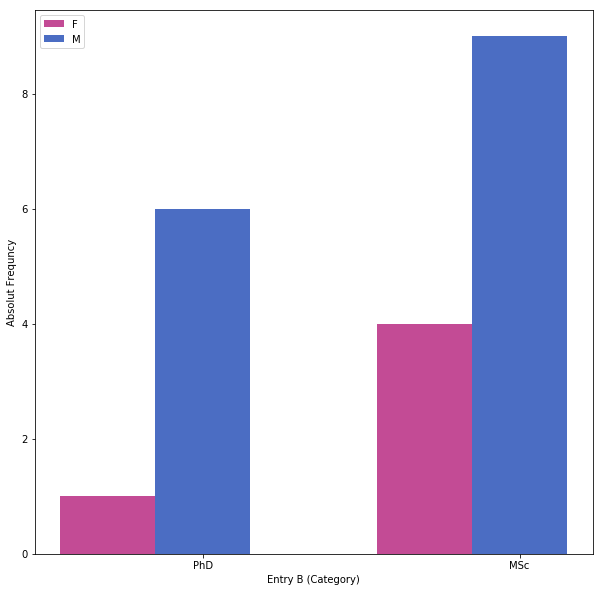

In [107]:
#Duble entry table's outs
gender_f = outs[0]
gender_m = outs[1]

barwidth = 0.30

#aumentar la tabla para tener una mejor visión de la información.
plt.figure(figsize=(10,10))

"""
first check the width of the first bar
and then incrementally position the others,
by the reference of the widths of the previous ones.
"""
r1 = np.arange(len(gender_f))
r2 = [x + barwidth for x in r1]

#Print the bar with its characteristics

plt.bar(r1,gender_f,color="#C34B95",width=barwidth, label="F")
plt.bar(r2,gender_m,color="#4B6DC3",width=barwidth, label="M")

"""
Tags are added on the X axis, in this type of graph there is a particularity,
there is a loop that distributes the subtitles uniformly in each of the groups.
"""

plt.xticks([r+barwidth for r in range(len(gender_m))],list(eB))

#Labels
plt.ylabel("Absolut Frequncy")
plt.xlabel("Entry B (Category)")

#Bar chart's legend
plt.legend()

### What's the percentage of students (boys) who are doing a master in MSc?

In [83]:
sol1 = len(dta[(dta["Gender"]=="M") & (dta["Category"]=="MSc")])/len(dta)
sol1 = ceil(sol1*100)
print("Solution : {}%".format(sol1))

Solution : 45%


### Marginal frequencies

In a __two-dimensional__ distribution of variables, __*the number of times that a value of one variable repeats itself*__, independently of the behavior of the other variable.

In [99]:
#Of all the girls, how many of them are doing a master?
nfm = len(dta[(dta["Gender"]=="F") & (dta["Category"]=="MSc")])
#Of all the boys, how many of them are doing a master?
nmm = len(dta[(dta["Gender"]=="M") & (dta["Category"]=="MSc")])
#Of all the girls, how many of them are doing a PhD?
nfd = len(dta[(dta["Gender"]=="F") & (dta["Category"]=="PhD")])
#Of all the boys, how many of them are doing a PhD?
nmd = len(dta[(dta["Gender"]=="M") & (dta["Category"]=="PhD")])

#### Of all the girls,What's the percentage of them who are doing a master?

In [131]:
percent_wm = nfm/sum(gender_f)
percent_wm = ceil(percent_wm*100)
percent_wd = 100-percent_wm #The rest of girls
print("Solution : {}%".format(percent_wm))

Solution : 80%


#### Of all the boys,What's the percentage of them who are doing a PhD?

In [132]:
percent_md = nmd/sum(gender_m)
percent_md = ceil(percent_md*100)
percent_mm = 100-percent_md #the rest of boys
print("Solution : {}%".format(percent_md))

Solution : 40%


### Percentage distribution of students according to category by gender.

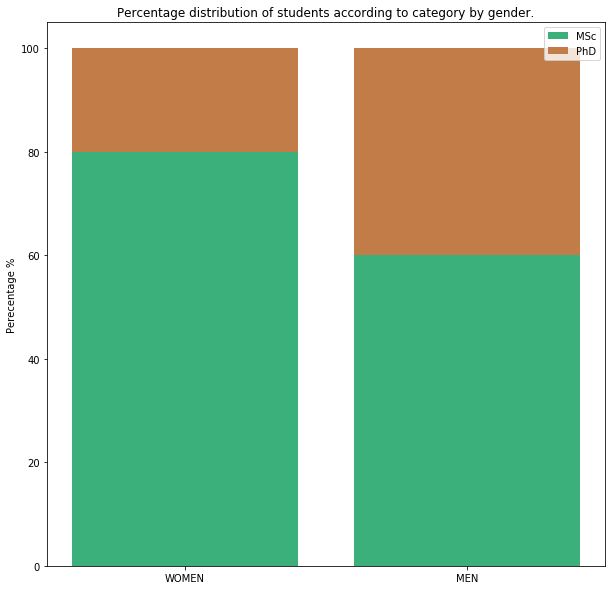

In [212]:
stud_msc = [percent_wm,percent_mm]
stud_phd = [percent_wd,percent_md]

#sintax 
"""
bar_A = [x1,x2]
bar_B = [y1,y2]

bottom = y2

|
|
| x1  x2
| y2  y2
|-----------

"""

#legends list
legends = ["MSc","PhD"]

#Gender
genders = ["WOMEN","MEN"]

plt.figure(figsize=(10,10))

#Pint bars
plt.bar(genders,stud_msc,color="#3BB07B")
plt.bar(genders,stud_phd,color="#C27C47", bottom=stud_msc)

#Labels and legens
plt.ylabel("Perecentage %")
plt.title("Percentage distribution of students according to category by gender.")
plt.legend(legends)

### Of all master students, how many of them are girls?

In [175]:
#Students who are doing a master MSc
master_stud = len(dta[dta["Category"]=="MSc"])
#Women who are doing a master MSc 
per_master_girl_stud = ceil((nfm/master_stud)*100)
per_master_boy_stud = 100 - per_master_girl_stud
print("Solution: {}%".format(per_master_girl_stud))
per_master_boy_stud

Solution: 31%


69

### Of all PhD students, how many of them are girls?

In [176]:
#Students who are doing a PhD
phd_stud = len(dta[dta["Category"]=="PhD"])
#Women who are doing a PhD
per_phd_girl_stud = ceil((nfd/phd_stud)*100)
per_phd_boy_stud = 100 - per_phd_girl_stud
print("Solution: {}%".format(per_phd_girl_stud))
per_phd_boy_stud

Solution: 15%


85

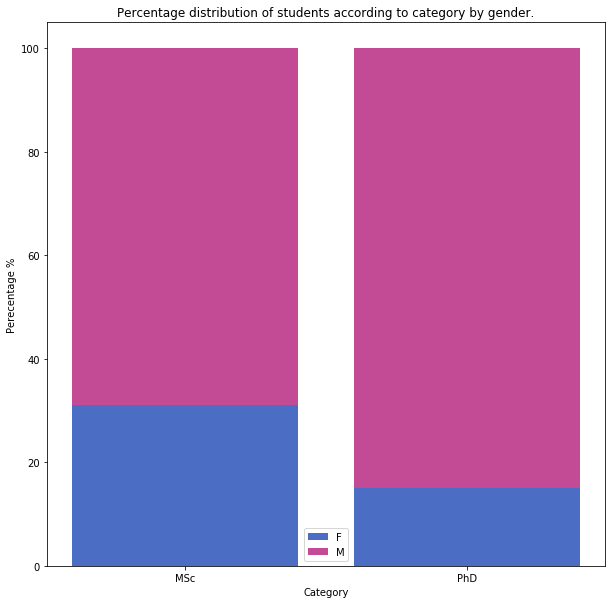

In [199]:
men = [per_master_boy_stud,per_phd_boy_stud]
women = [per_master_girl_stud,per_phd_girl_stud]


#legends list
legends = ["F","M"]

#Gender
category = ["MSc","PhD"]

plt.figure(figsize=(10,10))

#Pint bars
plt.bar(category,women,color="#4B6DC3")
plt.bar(category,men,color="#C34B95", bottom=women)

#Labels and legens
plt.ylabel("Perecentage %")
plt.xlabel("Category")
plt.title("Percentage distribution of students according to category by gender.")
plt.legend(legends)